O. Pannekoucke$^{1,2,3}$

$^1$ INPT-ENM, Toulouse, France

$^2$ CNRM, Université de Toulouse, Météo-France, CNRS, Toulouse, France

$^3$ CERFACS, Toulouse, France

(olivier.pannekoucke@meteo.fr)

**Abstract**

This notebook illustrates the use of sympkf to build and handle the PKF dynamics associated with the transport of two chemical species over a 1D domain, and in the case of a periodic chemical reaction. Hence, the dynamics reads as 
$$\left\{\begin{array}{c}
\partial_t A +u\partial_x A =B\\
\partial_t B +u\partial_x B =-A
\end{array}\right.$$
where $A$ and $B$ are functions of $t,x$, and $u(x)$ is a stationnary wind.

Thanks to the splitting strategy, the PKF is first applied in 0D on the periodic reaction, than on the full dynamics.

# Definition of the 1D multivariate dynamics

In [20]:
import sympy
sympy.init_printing() 

**Definition of the dynamics from sympy tools**

In [19]:
from sympy import Function, Derivative, Eq, symbols
from sympkf import SymbolicPKF, t, PDESystem

In [21]:
x = symbols('x')
u = Function('u')(x)
A = Function('A')(t,x)
B = Function('B')(t,x)

# 0D periodic chemical reaction

In [22]:
# definition of the dynamics
dynamics = [Eq(Derivative(A,t), B), Eq(Derivative(B,t),-A)]
dynamics

In [23]:
pkf_dynamics = SymbolicPKF(dynamics)

In [24]:
# Processing of the PDE system
dyn = PDESystem( dynamics )
dyn

PDE System :
        prognostic functions : A(t, x), B(t, x)
        constant functions   : 
        exogeneous functions : 
        constants            : 
        

In [25]:
for equation in pkf_dynamics.in_metric:    
    #display(equation.subs(pkf_dynamics.internal_closure)) 
    display(equation)

                                                             _______________  
                                                         2⋅╲╱ {V_{B}}(t, x) ⋅E
∂                        2⋅V_AB(t, x)⋅{g_{A,xx}}(t, x)                        
──({g_{A,xx}}(t, x)) = - ───────────────────────────── + ─────────────────────
∂t                               {V_{A}}(t, x)                                
                                                                              

          ⎛∂                              ∂                             ⎞     
xpectation⎜──({\varepsilon_{A}}(t, x, ω))⋅──({\varepsilon_{B}}(t, x, ω))⎟   Ex
          ⎝∂x                             ∂x                            ⎠     
───────────────────────────────────────────────────────────────────────── + ──
                   _______________                                            
                 ╲╱ {V_{A}}(t, x)                                             

         ⎛                           ∂            

                                                           _______________    
                                                       2⋅╲╱ {V_{A}}(t, x) ⋅Exp
∂                      2⋅V_AB(t, x)⋅{g_{B,xx}}(t, x)                          
──({g_{B,xx}}(t, x)) = ───────────────────────────── - ───────────────────────
∂t                             {V_{B}}(t, x)                                  
                                                                              

        ⎛∂                              ∂                             ⎞     __
ectation⎜──({\varepsilon_{A}}(t, x, ω))⋅──({\varepsilon_{B}}(t, x, ω))⎟   ╲╱ {
        ⎝∂x                             ∂x                            ⎠       
─────────────────────────────────────────────────────────────────────── + ────
                 _______________                                              
               ╲╱ {V_{B}}(t, x)                                               

_____________            ⎛                        

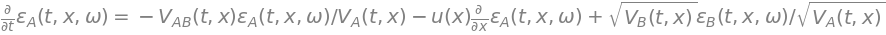

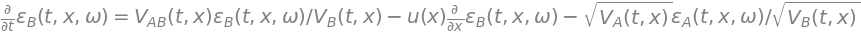

In [31]:
for equation in pkf_dynamics._epsilon_system:
    display(equation)

In [33]:
for term in pkf_dynamics.unclosed_terms:
    display(term)

           ⎛                           ∂                             ⎞
Expectation⎜{\varepsilon_{A}}(t, x, ω)⋅──({\varepsilon_{B}}(t, x, ω))⎟
           ⎝                           ∂x                            ⎠

           ⎛∂                              ∂                             ⎞
Expectation⎜──({\varepsilon_{A}}(t, x, ω))⋅──({\varepsilon_{B}}(t, x, ω))⎟
           ⎝∂x                             ∂x                            ⎠

           ⎛                           ∂                             ⎞
Expectation⎜{\varepsilon_{B}}(t, x, ω)⋅──({\varepsilon_{A}}(t, x, ω))⎟
           ⎝                           ∂x                            ⎠

# 1D transport of a periodic chemical reaction

In [27]:
# Definition of the dynamics
dynamics = [Eq(Derivative(A,t),-u*Derivative(A,x)+ B), Eq(Derivative(B,t), -u*Derivative(B,x)-A)]
dynamics

In [28]:
pkf_dynamics = SymbolicPKF(dynamics)

In [29]:
# Processing of the PDE system
dyn = PDESystem( dynamics )
dyn

PDE System :
        prognostic functions : A(t, x), B(t, x)
        constant functions   : u(x)
        exogeneous functions : 
        constants            : 
        

In [30]:
for equation in pkf_dynamics.in_metric:    
    #display(equation.subs(pkf_dynamics.internal_closure)) 
    display(equation)

                                   ∂                                   ∂      
                   V_AB(t, x)⋅u(x)⋅──({V_{B}}(t, x))   V_AB(t, x)⋅u(x)⋅──({V_{
∂                                  ∂x                                  ∂x     
──(V_AB(t, x)) = - ───────────────────────────────── - ───────────────────────
∂t                          2⋅{V_{B}}(t, x)                     2⋅{V_{A}}(t, x

                                                                              
A}}(t, x))                                                                    
                    _______________   _______________            ⎛            
────────── - u(x)⋅╲╱ {V_{A}}(t, x) ⋅╲╱ {V_{B}}(t, x) ⋅Expectation⎜{\varepsilon
)                                                                ⎝            

                                                                              
                                                                              
               ∂                             ⎞    

                                                                              
                                                                              
∂                        2⋅V_AB(t, x)⋅{g_{A,xx}}(t, x)        ∂               
──({g_{A,xx}}(t, x)) = - ───────────────────────────── - u(x)⋅──({g_{A,xx}}(t,
∂t                               {V_{A}}(t, x)                ∂x              
                                                                              

                                         _______________            ⎛∂        
                                     2⋅╲╱ {V_{B}}(t, x) ⋅Expectation⎜──({\vare
                          d                                         ⎝∂x       
 x)) - 2⋅{g_{A,xx}}(t, x)⋅──(u(x)) + ─────────────────────────────────────────
                          dx                                                 _
                                                                           ╲╱ 

                      ∂                           

                                                                              
                                                                              
∂                      2⋅V_AB(t, x)⋅{g_{B,xx}}(t, x)        ∂                 
──({g_{B,xx}}(t, x)) = ───────────────────────────── - u(x)⋅──({g_{B,xx}}(t, x
∂t                             {V_{B}}(t, x)                ∂x                
                                                                              

         _______________            ⎛∂                              ∂         
     2⋅╲╱ {V_{A}}(t, x) ⋅Expectation⎜──({\varepsilon_{A}}(t, x, ω))⋅──({\varep
                                    ⎝∂x                             ∂x        
)) - ─────────────────────────────────────────────────────────────────────────
                                             _______________                  
                                           ╲╱ {V_{B}}(t, x)                   

                    ⎞     _______________         

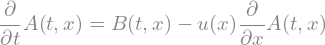

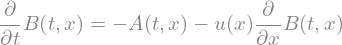

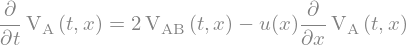

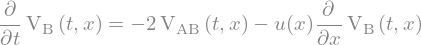

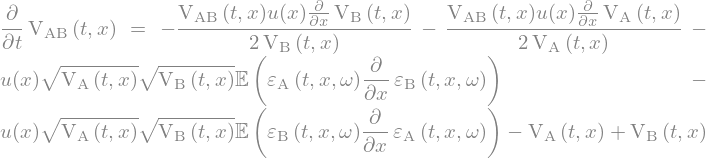

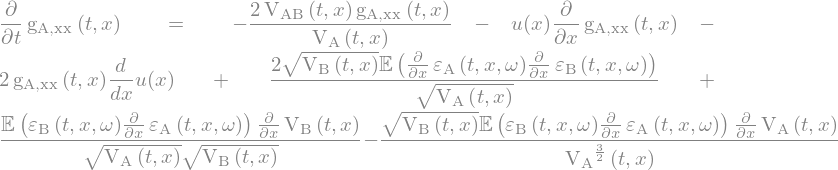

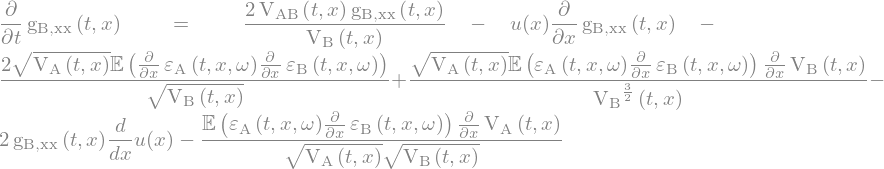

In [10]:
for equation in pkf_dynamics.in_metric:    
    display(equation.subs(pkf_dynamics.internal_closure))     

In [34]:
for equation in pkf_dynamics.in_aspect:    display(equation)

                                   ∂                                   ∂      
                   V_AB(t, x)⋅u(x)⋅──({V_{B}}(t, x))   V_AB(t, x)⋅u(x)⋅──({V_{
∂                                  ∂x                                  ∂x     
──(V_AB(t, x)) = - ───────────────────────────────── - ───────────────────────
∂t                          2⋅{V_{B}}(t, x)                     2⋅{V_{A}}(t, x

                                                                              
A}}(t, x))                                                                    
                    _______________   _______________            ⎛            
────────── - u(x)⋅╲╱ {V_{A}}(t, x) ⋅╲╱ {V_{B}}(t, x) ⋅Expectation⎜{\varepsilon
)                                                                ⎝            

                                                                              
                                                                              
               ∂                             ⎞    

                                                                              
                                                                              
∂                      2⋅V_AB(t, x)⋅{s_{A,xx}}(t, x)        ∂                 
──({s_{A,xx}}(t, x)) = ───────────────────────────── - u(x)⋅──({s_{A,xx}}(t, x
∂t                             {V_{A}}(t, x)                ∂x                
                                                                              

                                       _______________           2            
                                   2⋅╲╱ {V_{B}}(t, x) ⋅{s_{A,xx}} (t, x)⋅Expec
                        d                                                     
)) + 2⋅{s_{A,xx}}(t, x)⋅──(u(x)) - ───────────────────────────────────────────
                        dx                                                    
                                                                              

      ⎛∂                              ∂           

                                                                              
                                                                              
∂                        2⋅V_AB(t, x)⋅{s_{B,xx}}(t, x)        ∂               
──({s_{B,xx}}(t, x)) = - ───────────────────────────── - u(x)⋅──({s_{B,xx}}(t,
∂t                               {V_{B}}(t, x)                ∂x              
                                                                              

           _______________           2                  ⎛∂                    
       2⋅╲╱ {V_{A}}(t, x) ⋅{s_{B,xx}} (t, x)⋅Expectation⎜──({\varepsilon_{A}}(
                                                        ⎝∂x                   
 x)) + ───────────────────────────────────────────────────────────────────────
                                                        _______________       
                                                      ╲╱ {V_{B}}(t, x)        

          ∂                             ⎞     ____

In [35]:
for term in pkf_dynamics.unclosed_terms:
    display(term)

           ⎛                           ∂                             ⎞
Expectation⎜{\varepsilon_{A}}(t, x, ω)⋅──({\varepsilon_{B}}(t, x, ω))⎟
           ⎝                           ∂x                            ⎠

           ⎛∂                              ∂                             ⎞
Expectation⎜──({\varepsilon_{A}}(t, x, ω))⋅──({\varepsilon_{B}}(t, x, ω))⎟
           ⎝∂x                             ∂x                            ⎠

           ⎛                           ∂                             ⎞
Expectation⎜{\varepsilon_{B}}(t, x, ω)⋅──({\varepsilon_{A}}(t, x, ω))⎟
           ⎝                           ∂x                            ⎠